In [16]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn  as sns
%matplotlib inline

 # Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [10]:
df=pd.read_csv('diabetes_clean_dataset.csv')

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

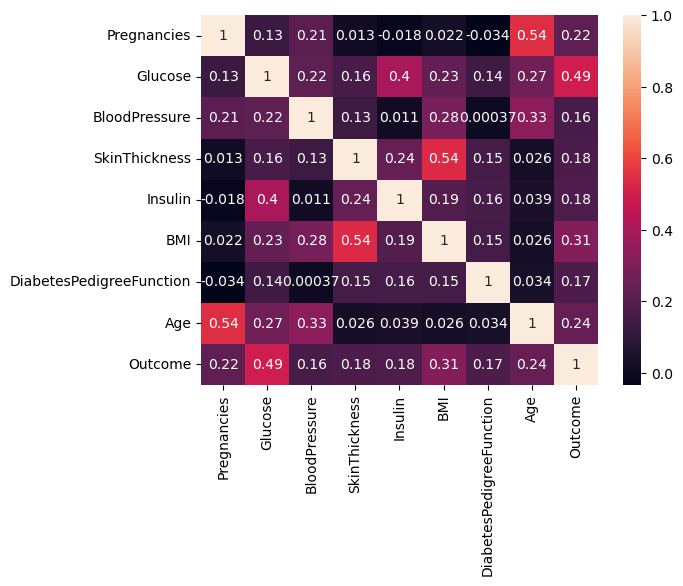

In [17]:
sns.heatmap(df.corr(),annot=True)

# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [19]:
x=df.iloc[:,:-1]

In [20]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [22]:
y=df.iloc[:,-1]

In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=50,random_state=40)

In [30]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
139,5,105.0,72.000000,29.000000,325.000000,36.9,0.159,28
666,4,145.0,82.000000,18.000000,79.799479,32.5,0.235,70
413,1,143.0,74.000000,22.000000,61.000000,26.2,0.256,21
185,7,194.0,68.000000,28.000000,79.799479,35.9,0.745,41
266,0,138.0,69.105469,20.536458,79.799479,36.3,0.933,25
...,...,...,...,...,...,...,...,...
440,0,189.0,104.000000,25.000000,79.799479,34.3,0.435,41
165,6,104.0,74.000000,18.000000,156.000000,29.9,0.722,41
7,10,115.0,69.105469,20.536458,79.799479,35.3,0.134,29
219,5,112.0,66.000000,20.536458,79.799479,37.8,0.261,41


In [31]:
y_train

139    0
666    1
413    0
185    1
266    1
      ..
440    1
165    1
7      0
219    1
326    1
Name: Outcome, Length: 718, dtype: int64

# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [32]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [33]:
classifier=DecisionTreeClassifier()

In [34]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.4753321850393701, 0.9666666666666667, 'x[1] <= 127.5\ngini = 0.451\nsamples = 718\nvalue = [471, 247]'),
 Text(0.22059547244094488, 0.9, 'x[7] <= 28.5\ngini = 0.31\nsamples = 453\nvalue = [366, 87]'),
 Text(0.0890748031496063, 0.8333333333333334, 'x[5] <= 45.4\ngini = 0.156\nsamples = 258\nvalue = [236, 22]'),
 Text(0.06200787401574803, 0.7666666666666667, 'x[5] <= 30.95\ngini = 0.138\nsamples = 254\nvalue = [235, 19]'),
 Text(0.031496062992125984, 0.7, 'x[0] <= 7.0\ngini = 0.029\nsamples = 135\nvalue = [133, 2]'),
 Text(0.023622047244094488, 0.6333333333333333, 'x[4] <= 48.5\ngini = 0.015\nsamples = 134\nvalue = [133, 1]'),
 Text(0.015748031496062992, 0.5666666666666667, 'x[4] <= 47.0\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.007874015748031496, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.023622047244094488, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.031496062992125984, 0.5666666666666667, 'gini = 0.0\nsamples = 117\nvalue = [117, 0]'

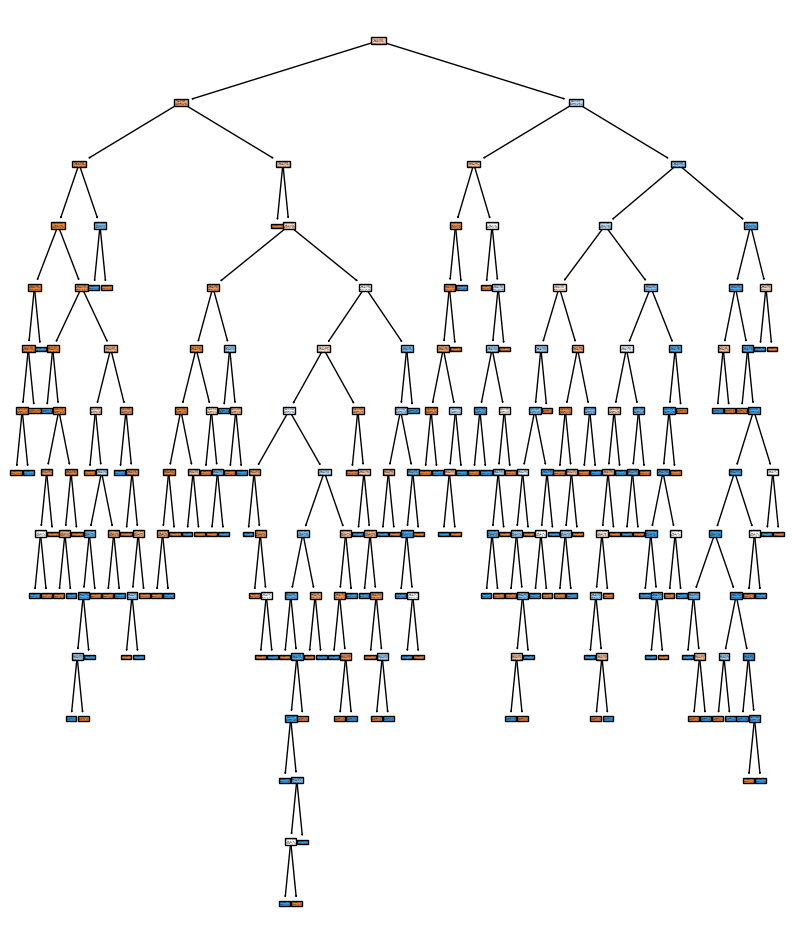

In [35]:
plt.figure(figsize=(10,12))
tree.plot_tree(classifier,filled=True)

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [37]:
y_pred=classifier.predict(x_test)

In [38]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [42]:
score=accuracy_score(y_pred,y_test)
cla=classification_report(y_pred,y_test)
confusion_matrix(y_test, y_pred)

array([[22,  7],
       [10, 11]], dtype=int64)

In [43]:
cla

'              precision    recall  f1-score   support\n\n           0       0.76      0.69      0.72        32\n           1       0.52      0.61      0.56        18\n\n    accuracy                           0.66        50\n   macro avg       0.64      0.65      0.64        50\nweighted avg       0.67      0.66      0.66        50\n'

In [44]:
score

0.66

In [45]:
precision=precision_score(y_test, y_pred)
Recall= recall_score(y_test, y_pred)

In [46]:
Recall

0.5238095238095238

In [47]:
precision

0.6111111111111112

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [60]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [61]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.4166666666666667, 0.9166666666666666, 'x[1] <= 127.5\nentropy = 0.929\nsamples = 718\nvalue = [471, 247]'),
 Text(0.15555555555555556, 0.75, 'x[5] <= 26.45\nentropy = 0.706\nsamples = 453\nvalue = [366, 87]'),
 Text(0.06666666666666667, 0.5833333333333334, 'x[4] <= 48.5\nentropy = 0.072\nsamples = 116\nvalue = [115, 1]'),
 Text(0.044444444444444446, 0.4166666666666667, 'x[4] <= 47.0\nentropy = 0.503\nsamples = 9\nvalue = [8, 1]'),
 Text(0.022222222222222223, 0.25, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.06666666666666667, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08888888888888889, 0.4166666666666667, 'entropy = 0.0\nsamples = 107\nvalue = [107, 0]'),
 Text(0.24444444444444444, 0.5833333333333334, 'x[7] <= 28.5\nentropy = 0.819\nsamples = 337\nvalue = [251, 86]'),
 Text(0.15555555555555556, 0.4166666666666667, 'x[5] <= 30.95\nentropy = 0.524\nsamples = 178\nvalue = [157, 21]'),
 Text(0.1111111111111111, 0.25, 'x[0] <= 7.0\nentropy = 0.131\nsamp

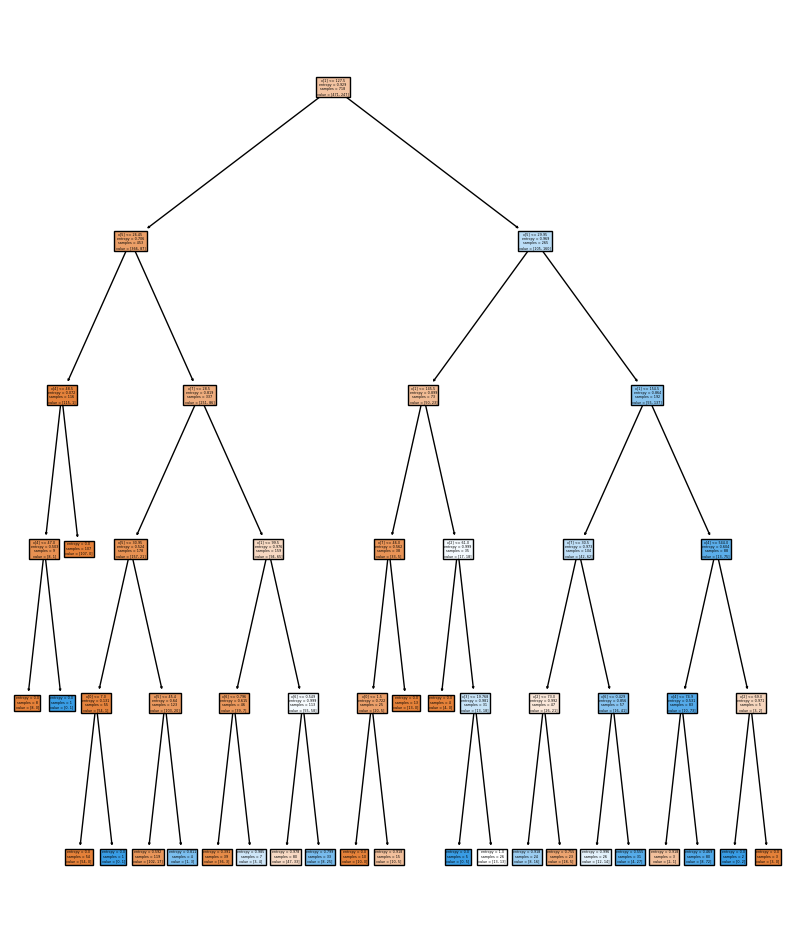

In [62]:
plt.figure(figsize=(10,12))
tree.plot_tree(classifier,filled=True)

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [63]:
y_pred=classifier.predict(x_test)

In [64]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0], dtype=int64)

In [65]:
score=accuracy_score(y_pred,y_test)
cla=classification_report(y_pred,y_test)
print(score)
print(cla)

0.76
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.71      0.71      0.71        21

    accuracy                           0.76        50
   macro avg       0.75      0.75      0.75        50
weighted avg       0.76      0.76      0.76        50

